<a href="https://colab.research.google.com/github/rrubel1821/Student-Performance-Analysis-and-Visualization/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample data saved to student_data.csv

--- Data Analysis ---
Average Scores per Subject:
Subject
English    88.0
Math       88.5
Science    61.5
Name: Score, dtype: float64

Students with <75% Attendance:
  Student Name Student ID  Subject  Score  Attendance Percentage  \
1          Bob  STU-23456  Science     78                     72   
3        David  STU-45678  English     88                     65   
4          Eve  STU-56789  Science     45                     50   

  Assignment Completion  
1                    No  
3                    No  
4                   Yes  

Students Missing Assignments:
  Student Name Student ID  Subject  Score  Attendance Percentage  \
1          Bob  STU-23456  Science     78                     72   
3        David  STU-45678  English     88                     65   

  Assignment Completion  
1                    No  
3                    No  


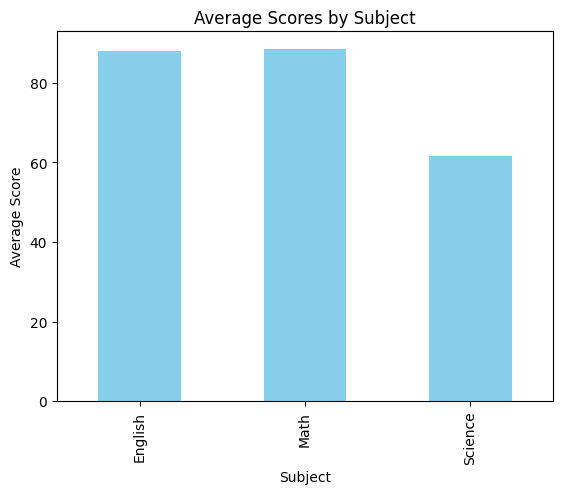

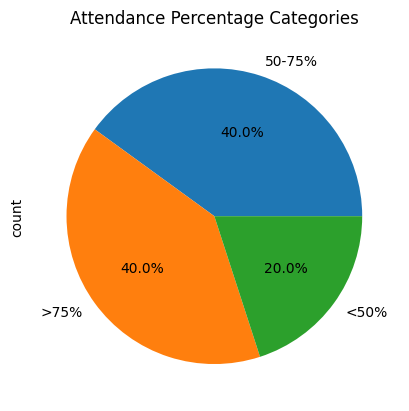

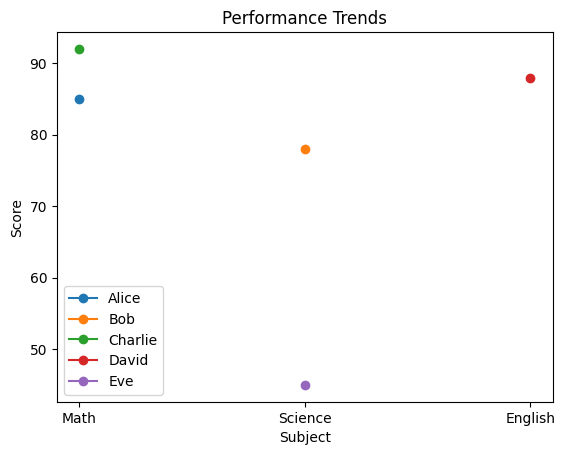


Aggregate Scores:
  Student Name  Aggregate Score
0        Alice             85.0
1          Bob             78.0
2      Charlie             92.0
3        David             88.0
4          Eve             45.0

Grades:
  Student Name  Subject Grade
0        Alice     Math     A
1          Bob  Science     B
2      Charlie     Math     A
3        David  English     A
4          Eve  Science  Fail

--- Interactive Menu ---
1. Add a new student
2. Search for a student
3. Update a student's score or attendance
4. Exit
Enter your choice: 1
Enter student name: Noor Nobi
Enter student ID: STU-23456
Enter subject: Biology
Enter score: 78
Enter attendance percentage: 100
Assignment completed (Yes/No): yes
Student added successfully!

--- Interactive Menu ---
1. Add a new student
2. Search for a student
3. Update a student's score or attendance
4. Exit
Enter your choice: 4
Updated data saved to student_data.csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Simulate or load a CSV file
def generate_sample_data(file_name='student_data.csv'):
    data = {
        'Student Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
        'Student ID': ['STU-12345', 'STU-23456', 'STU-34567', 'STU-45678', 'STU-56789'],
        'Subject': ['Math', 'Science', 'Math', 'English', 'Science'],
        'Score': ['85', '78', '92', '88', '45'],
        'Attendance Percentage': [90, 72, 85, 65, 50],
        'Assignment Completion': ['Yes', 'No', 'Yes', 'No', 'Yes']
    }
    df = pd.DataFrame(data)
    df.to_csv(file_name, index=False)
    print(f"Sample data saved to {file_name}")

# Read CSV file
def read_csv_file(file_name):
    try:
        return pd.read_csv(file_name)
    except FileNotFoundError:
        print("Error: File not found.")
        return pd.DataFrame()

# Write data to a new CSV file
def write_csv_file(df, file_name):
    df.to_csv(file_name, index=False)
    print(f"Updated data saved to {file_name}")

# Data Analysis and Manipulation
def analyze_data(df):
    print("\n--- Data Analysis ---")
    print(f"Average Scores per Subject:\n{df.groupby('Subject')['Score'].mean()}")
    print(f"\nStudents with <75% Attendance:\n{df[df['Attendance Percentage'] < 75]}")
    print(f"\nStudents Missing Assignments:\n{df[df['Assignment Completion'] == 'No']}")

def convert_score_to_int(df):
    df['Score'] = df['Score'].astype(int)

# Visualization
def visualize_data(df):
    # Bar Chart of Average Scores by Subject
    avg_scores = df.groupby('Subject')['Score'].mean()
    avg_scores.plot(kind='bar', title='Average Scores by Subject', ylabel='Average Score', xlabel='Subject', color='skyblue')
    plt.show()

    # Pie Chart of Attendance Percentage Categories
    attendance_categories = pd.cut(df['Attendance Percentage'], bins=[0, 50, 75, 100], labels=['<50%', '50-75%', '>75%'])
    attendance_categories.value_counts().plot(kind='pie', autopct='%1.1f%%', title='Attendance Percentage Categories')
    plt.show()

    # Line Graph Showing Performance Trends Over Time
    for student in df['Student Name'].unique():
        student_data = df[df['Student Name'] == student]
        plt.plot(student_data['Subject'], student_data['Score'], marker='o', label=student)
    plt.title('Performance Trends')
    plt.xlabel('Subject')
    plt.ylabel('Score')
    plt.legend()
    plt.show()

# Implement Functions and Logic
def calculate_aggregate_scores(df):
    df['Aggregate Score'] = df.groupby('Student Name')['Score'].transform('mean')
    print(f"\nAggregate Scores:\n{df[['Student Name', 'Aggregate Score']].drop_duplicates()}")

def determine_grades(df):
    conditions = [
        (df['Score'] >= 85),
        (df['Score'] >= 70) & (df['Score'] < 85),
        (df['Score'] >= 50) & (df['Score'] < 70),
        (df['Score'] < 50)
    ]
    grades = ['A', 'B', 'C', 'Fail']
    df['Grade'] = np.select(conditions, grades)
    print(f"\nGrades:\n{df[['Student Name', 'Subject', 'Grade']]}")

# Advanced Features
def validate_student_id(student_id):
    pattern = r"STU-\d{5}"
    return bool(re.match(pattern, student_id))

# Interactive Console Input/Output
def interactive_console(df):
    while True:
        print("\n--- Interactive Menu ---")
        print("1. Add a new student")
        print("2. Search for a student")
        print("3. Update a student's score or attendance")
        print("4. Exit")
        choice = input("Enter your choice: ")

        if choice == '1':
            name = input("Enter student name: ")
            student_id = input("Enter student ID: ")
            while not validate_student_id(student_id):
                print("Invalid ID format. It should match 'STU-12345'.")
                student_id = input("Enter student ID: ")
            subject = input("Enter subject: ")
            score = int(input("Enter score: "))
            attendance = int(input("Enter attendance percentage: "))
            assignment = input("Assignment completed (Yes/No): ")
            new_row = pd.DataFrame([[name, student_id, subject, score, attendance, assignment]],
                                   columns=['Student Name', 'Student ID', 'Subject', 'Score', 'Attendance Percentage', 'Assignment Completion'])
            df = pd.concat([df, new_row], ignore_index=True)
            print("Student added successfully!")

        elif choice == '2':
            search = input("Enter student name or ID: ")
            results = df[(df['Student Name'] == search) | (df['Student ID'] == search)]
            if results.empty:
                print("No student found.")
            else:
                print(f"Search Results:\n{results}")

        elif choice == '3':
            student_id = input("Enter student ID: ")
            if student_id in df['Student ID'].values:
                field = input("What do you want to update? (Score/Attendance): ").lower()
                if field == 'score':
                    new_score = int(input("Enter new score: "))
                    df.loc[df['Student ID'] == student_id, 'Score'] = new_score
                    print("Score updated successfully!")
                elif field == 'attendance':
                    new_attendance = int(input("Enter new attendance percentage: "))
                    df.loc[df['Student ID'] == student_id, 'Attendance Percentage'] = new_attendance
                    print("Attendance updated successfully!")
                else:
                    print("Invalid field.")
            else:
                print("Student ID not found.")

        elif choice == '4':
            break

        else:
            print("Invalid choice. Please try again.")
    return df

# Main function
def main():
    file_name = 'student_data.csv'
    generate_sample_data(file_name)
    df = read_csv_file(file_name)
    convert_score_to_int(df)
    analyze_data(df)
    visualize_data(df)
    calculate_aggregate_scores(df)
    determine_grades(df)
    df = interactive_console(df)
    write_csv_file(df, file_name)

if __name__ == "__main__":
    main()
